In [445]:
import pandas as pd
import numpy as np
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings 
warnings.filterwarnings('ignore')
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
import plotly.graph_objs as go
import chart_studio.plotly as py
import cufflinks
pd.options.display.max_columns = 30
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()
from collections import Counter
import scattertext as st
import spacy
from pprint import pprint
import en_core_web_sm
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import nltk

nlp = spacy.load('en_core_web_md')

Loading BokehJS ...

In [446]:
df = pd.read_csv('Isu_Strategis_Jawa_RKPD_2022.csv', sep=';')
df

,Provinsi,Isu Strategis
0,DKI Jakarta,Peningkatan Kualitas Pembangunan Kesehatan: Re...
1,Jawa Barat,Kualitas nilai kehidupan dan daya saing sumber...
2,Jawa Tengah,a. Penanggulangan Kemiskinan Kemiskinan merupa...
3,DI Yogyakarta,1. Belum Optimalnya Derajat Kualitas Sumberday...
4,Jawa Timur,Belum tercukupinya tenaga kerja yang terampil ...
5,Banten,Isu strategis Provinsi Banten Tahun 2022 dirum...


In [447]:
a = 0 
n = len(df)
for i in range(a,n):
    print(df['Provinsi'][i])
    print(df['Isu Strategis'][i])
    print()

DKI Jakarta
Peningkatan Kualitas Pembangunan Kesehatan: Reformasi Sistem Kesehatan a. Optimalisasi upaya preventif melalui PHBS dan GERMAS b. Program Urban Health c. Penguatan peran Puskesmas dan Posyandu d. Peningkatan akses layanan kesehatan, melalui Pembayaran asuransi Penerima Bantuan Iuran (PBI BPJS) e. Peningkatan Kualitas Pelayanan RSUD f. Penguatan Lab Kesehatan Daerah g. Optimalisasi pemanfaatan teknologi informasi dan digitalisasi sistem kesehatan Peningkatan Kualitas Pendidikan: Pendidikan dan pelatihan vokasi untuk mendukung pemulihan ketahanan ekonomi b. Peningkatan akses dan penguatan satuan pendidikan antara lain melalui pemberian bantuan biaya personal pendidikan bagi peserta didik dan mahasiswa dari keluarga tidak mampu (Kartu Jakarta Pintar dan Kartu Jakarta Mahasiswa Unggul) serta Biaya Operasional Pendidikan (BOP) Pengurangan Ketimpangan Ekonomi dan Perluasan Kesempatan Kerja: Penguatan UMKM a. Menumbuhkan Kewirausahaan Baru (start up) b. Digitalisasi UMKM c. Fasili

In [448]:
#Normalisasi Text
#Cleaning Character, lower case, hapus angka dsb
import nltk
import re
def casefolding(comment):
    comment = comment.lower()
    comment = comment.strip(" ")
    comment = re.sub(r'[?|$|.|!_:\/")(-+,)]|', '', comment)
    comment = re.sub(r'-|%&!”#’*;}<=~>≤@^`{', '', comment)
    comment = re.sub(r"\d+", "", comment) #hapus angka
    return comment

df['Isu Strategis'] = df['Isu Strategis'].apply(casefolding)

In [449]:
def preprocess(ReviewText):
    ReviewText = ReviewText.str.replace("(<br/>)", "")
    ReviewText = ReviewText.str.replace('(<a).*(>).*(</a>)', '')
    ReviewText = ReviewText.str.replace('(&amp)', '')
    ReviewText = ReviewText.str.replace('(&gt)', '')
    ReviewText = ReviewText.str.replace('(&lt)', '')
    ReviewText = ReviewText.str.replace('(\xa0)', '')
    ReviewText = ReviewText.str.replace('%', '') 
    return ReviewText
df['Isu Strategis'] = preprocess(df['Isu Strategis'])

In [450]:
a = 0 
n = len(df)
for i in range(a,n):
    print(df['Provinsi'][i])
    print(df['Isu Strategis'][i])
    print()

DKI Jakarta
peningkatan kualitas pembangunan kesehatan reformasi sistem kesehatan a optimalisasi upaya preventif melalui phbs dan germas b program urban health c penguatan peran puskesmas dan posyandu d peningkatan akses layanan kesehatan melalui pembayaran asuransi penerima bantuan iuran pbi bpjs e peningkatan kualitas pelayanan rsud f penguatan lab kesehatan daerah g optimalisasi pemanfaatan teknologi informasi dan digitalisasi sistem kesehatan peningkatan kualitas pendidikan pendidikan dan pelatihan vokasi untuk mendukung pemulihan ketahanan ekonomi b peningkatan akses dan penguatan satuan pendidikan antara lain melalui pemberian bantuan biaya personal pendidikan bagi peserta didik dan mahasiswa dari keluarga tidak mampu kartu jakarta pintar dan kartu jakarta mahasiswa unggul serta biaya operasional pendidikan bop pengurangan ketimpangan ekonomi dan perluasan kesempatan kerja penguatan umkm a menumbuhkan kewirausahaan baru start up b digitalisasi umkm c fasilitasi umkm dengan lembag

In [451]:
df

,Provinsi,Isu Strategis
0,DKI Jakarta,peningkatan kualitas pembangunan kesehatan ref...
1,Jawa Barat,kualitas nilai kehidupan dan daya saing sumber...
2,Jawa Tengah,a penanggulangan kemiskinan kemiskinan merupak...
3,DI Yogyakarta,belum optimalnya derajat kualitas sumberdaya ...
4,Jawa Timur,belum tercukupinya tenaga kerja yang terampil ...
5,Banten,isu strategis provinsi banten tahun dirumuska...


In [452]:
#Tokenization Kata
#impor word_tokenize dari modul nltk
from nltk.tokenize import word_tokenize #tokenisasi kata

def tokenword(data):
    tokens = nltk.tokenize.word_tokenize(data)
    return tokens

df['Isu Strategis'] = df['Isu Strategis'].apply(tokenword)
df

,Provinsi,Isu Strategis
0,DKI Jakarta,"[peningkatan, kualitas, pembangunan, kesehatan..."
1,Jawa Barat,"[kualitas, nilai, kehidupan, dan, daya, saing,..."
2,Jawa Tengah,"[a, penanggulangan, kemiskinan, kemiskinan, me..."
3,DI Yogyakarta,"[belum, optimalnya, derajat, kualitas, sumberd..."
4,Jawa Timur,"[belum, tercukupinya, tenaga, kerja, yang, ter..."
5,Banten,"[isu, strategis, provinsi, banten, tahun, diru..."


In [455]:
a = 0 
n = len(df)
for i in range(a,n):
    print(df['Provinsi'][i])
    print(df['Isu Strategis'][i])
    print()

DKI Jakarta
['peningkatan', 'kualitas', 'pembangunan', 'kesehatan', 'reformasi', 'sistem', 'kesehatan', 'a', 'optimalisasi', 'upaya', 'preventif', 'melalui', 'phbs', 'dan', 'germas', 'b', 'program', 'urban', 'health', 'c', 'penguatan', 'peran', 'puskesmas', 'dan', 'posyandu', 'd', 'peningkatan', 'akses', 'layanan', 'kesehatan', 'melalui', 'pembayaran', 'asuransi', 'penerima', 'bantuan', 'iuran', 'pbi', 'bpjs', 'e', 'peningkatan', 'kualitas', 'pelayanan', 'rsud', 'f', 'penguatan', 'lab', 'kesehatan', 'daerah', 'g', 'optimalisasi', 'pemanfaatan', 'teknologi', 'informasi', 'dan', 'digitalisasi', 'sistem', 'kesehatan', 'peningkatan', 'kualitas', 'pendidikan', 'pendidikan', 'dan', 'pelatihan', 'vokasi', 'untuk', 'mendukung', 'pemulihan', 'ketahanan', 'ekonomi', 'b', 'peningkatan', 'akses', 'dan', 'penguatan', 'satuan', 'pendidikan', 'antara', 'lain', 'melalui', 'pemberian', 'bantuan', 'biaya', 'personal', 'pendidikan', 'bagi', 'peserta', 'didik', 'dan', 'mahasiswa', 'dari', 'keluarga', 'tid

[('dan', 9), ('penguatan', 7), ('peningkatan', 6), ('pangan', 6), ('kesehatan', 5), ('a', 5), ('melalui', 5), ('b', 5), ('pendidikan', 5), ('kualitas', 3), ('sistem', 3), ('c', 3), ('digitalisasi', 3), ('ketahanan', 3), ('umkm', 3), ('reformasi', 2), ('optimalisasi', 2), ('urban', 2), ('d', 2), ('akses', 2), ('penerima', 2), ('bantuan', 2), ('e', 2), ('ekonomi', 2), ('biaya', 2), ('mahasiswa', 2), ('kartu', 2), ('jakarta', 2), ('investasi', 2), ('yang', 2), ('baik', 2), ('sosial', 2), ('data', 2), ('bansos', 2), ('pembangunan', 1), ('upaya', 1), ('preventif', 1), ('phbs', 1), ('germas', 1), ('program', 1), ('health', 1), ('peran', 1), ('puskesmas', 1), ('posyandu', 1), ('layanan', 1), ('pembayaran', 1), ('asuransi', 1), ('iuran', 1), ('pbi', 1), ('bpjs', 1), ('pelayanan', 1), ('rsud', 1), ('f', 1), ('lab', 1), ('daerah', 1), ('g', 1), ('pemanfaatan', 1), ('teknologi', 1), ('informasi', 1), ('pelatihan', 1), ('vokasi', 1), ('untuk', 1), ('mendukung', 1), ('pemulihan', 1), ('satuan', 1),

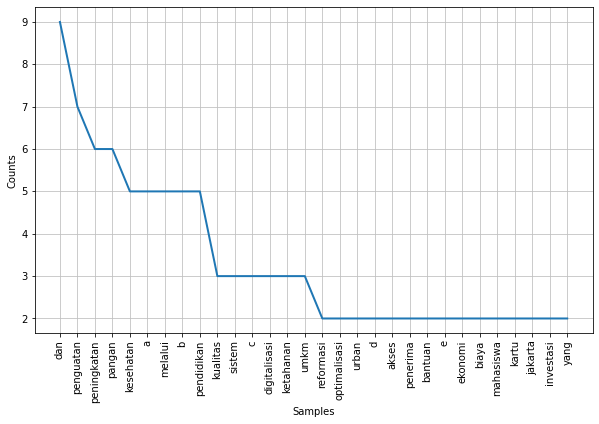

[('dan', 62), ('belum', 50), ('optimal', 18), ('yang', 17), ('optimalnya', 17), ('masih', 14), ('pembangunan', 13), ('masyarakat', 12), ('jawa', 12), ('barat', 12), ('di', 11), ('terhadap', 9), ('daya', 8), ('daerah', 8), ('rendahnya', 7), ('pada', 7), ('ekonomi', 7), ('akses', 6), ('dalam', 6), ('budaya', 6), ('pertanian', 6), ('tingkat', 6), ('desa', 6), ('kualitas', 5), ('kerja', 5), ('lingkungan', 5), ('provinsi', 5), ('pelayanan', 5), ('informasi', 5), ('tinggi', 4), ('dampak', 4), ('pandemi', 4), ('covid', 4), ('olahraga', 4), ('pengembangan', 4), ('jumlah', 4), ('standar', 4), ('sosial', 4), ('sektor', 4), ('peningkatan', 4), ('sehingga', 4), ('pemanfaatan', 4), ('air', 4), ('industri', 4), ('dengan', 4), ('secara', 4), ('penerapan', 4), ('lahan', 4), ('koperasi', 4), ('oleh', 4), ('meratanya', 3), ('partisipasi', 3), ('tidak', 3), ('pemerataan', 3), ('kesehatan', 3), ('memerlukan', 3), ('percepatan', 3), ('pemulihan', 3), ('kondisi', 3), ('lokal', 3), ('promosi', 3), ('meningka

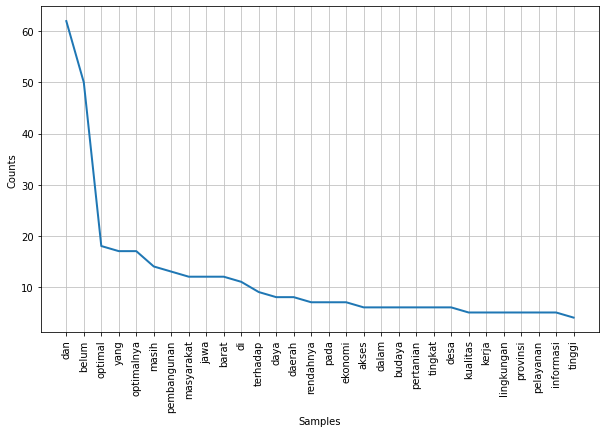

[('dan', 182), ('yang', 143), ('dengan', 67), ('di', 61), ('jawa', 51), ('tengah', 51), ('pada', 50), ('masyarakat', 49), ('sektor', 38), ('adalah', 34), ('dalam', 31), ('juga', 29), ('menjadi', 29), ('masih', 29), ('ini', 27), ('industri', 27), ('pertanian', 27), ('tahun', 26), ('dari', 26), ('ekonomi', 26), ('untuk', 26), ('pembangunan', 26), ('lain', 25), ('kerja', 24), ('kesehatan', 24), ('serta', 24), ('persen', 23), ('isu', 20), ('daya', 20), ('tidak', 19), ('hal', 19), ('covid', 19), ('tenaga', 19), ('pangan', 18), ('belum', 18), ('kelompok', 17), ('pendidikan', 16), ('nasional', 16), ('usaha', 15), ('peningkatan', 15), ('daerah', 14), ('kondisi', 14), ('pasar', 14), ('oleh', 14), ('pemerintah', 14), ('ke', 14), ('terhadap', 14), ('akan', 14), ('kemiskinan', 13), ('penduduk', 13), ('sebagai', 13), ('itu', 13), ('secara', 13), ('namun', 13), ('petani', 12), ('maupun', 12), ('produksi', 12), ('pandemi', 12), ('semakin', 12), ('antara', 12), ('manusia', 12), ('baik', 12), ('usia', 

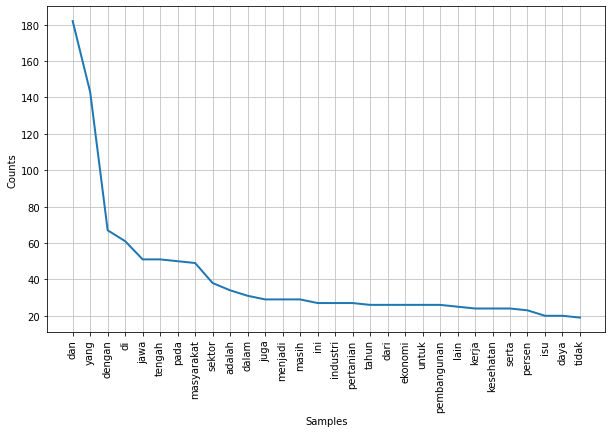

[('yang', 70), ('dan', 67), ('tahun', 46), ('belum', 45), ('masih', 43), ('pada', 41), ('di', 39), ('diy', 38), ('dari', 38), ('sebesar', 29), ('pendidikan', 24), ('jumlah', 24), ('dengan', 23), ('terdapat', 18), ('dalam', 16), ('angka', 16), ('data', 16), ('sosial', 16), ('sebanyak', 15), ('kasus', 15), ('kesehatan', 14), ('kondisi', 14), ('orang', 14), ('masyarakat', 13), ('a', 12), ('pelayanan', 12), ('tinggi', 12), ('untuk', 11), ('bencana', 11), ('b', 10), ('optimal', 10), ('urusan', 10), ('ini', 10), ('standar', 10), ('adalah', 10), ('jalan', 10), ('air', 10), ('km', 10), ('c', 9), ('covid', 9), ('ruang', 9), ('sekolah', 9), ('atau', 9), ('penduduk', 9), ('kualitas', 8), ('layanan', 8), ('permasalahan', 8), ('daerah', 8), ('pandemi', 8), ('mengalami', 8), ('hal', 8), ('menunjukkan', 8), ('dinas', 8), ('tidak', 8), ('kejadian', 8), ('rendah', 7), ('d', 7), ('tingkat', 7), ('tersebut', 7), ('guru', 7), ('dibandingkan', 7), ('anak', 7), ('rumah', 7), ('yaitu', 7), ('jiwa', 7), ('tot

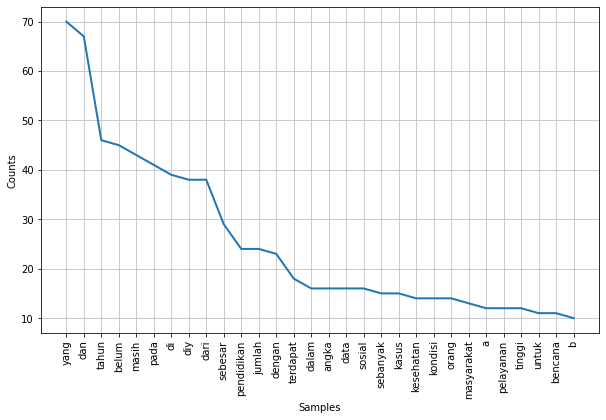

[('dan', 28), ('yang', 10), ('di', 10), ('belum', 8), ('isu', 8), ('strategis', 8), ('dengan', 8), ('peningkatan', 7), ('untuk', 6), ('serta', 6), ('wilayah', 6), ('jawa', 6), ('timur', 6), ('ini', 5), ('yaitu', 5), ('dapat', 5), ('akses', 5), ('lingkungan', 5), ('kemiskinan', 5), ('masyarakat', 5), ('kerja', 4), ('berkualitas', 4), ('industri', 4), ('terhubung', 4), ('prioritas', 4), ('nasional', 4), ('atas', 4), ('masih', 4), ('usaha', 4), ('optimalnya', 4), ('banjir', 4), ('tingginya', 4), ('terhadap', 4), ('perdesaan', 4), ('kebutuhan', 3), ('pusat', 3), ('meningkatkan', 3), ('manusia', 3), ('dijabarakan', 3), ('secara', 3), ('rinci', 3), ('sebagai', 3), ('berikut', 3), ('kualitas', 3), ('ekonomi', 3), ('antar', 3), ('layanan', 3), ('layak', 3), ('sektor', 3), ('bencana', 3), ('desa', 3), ('tenaga', 2), ('berteknologi', 2), ('tinggi', 2), ('sumberdaya', 2), ('berdaya', 2), ('saing', 2), ('pembangunan', 2), ('tidak', 2), ('sesuai', 2), ('dunia', 2), ('infrastruktur', 2), ('provinsi'

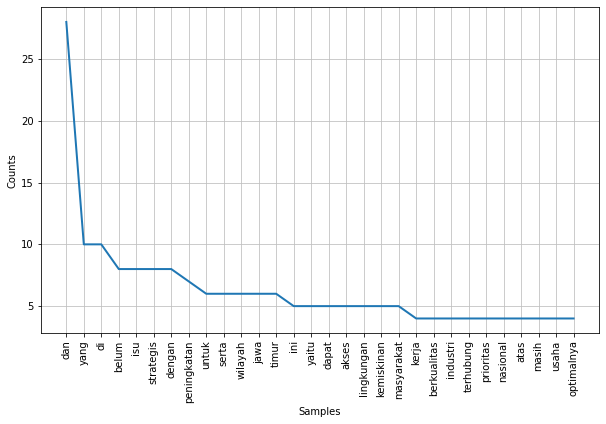

[('yang', 24), ('banten', 21), ('dan', 20), ('provinsi', 15), ('pada', 15), ('tahun', 11), ('ekonomi', 11), ('pembangunan', 11), ('peningkatan', 11), ('persen', 11), ('kualitas', 10), ('daya', 10), ('pertumbuhan', 9), ('dalam', 9), ('dari', 9), ('untuk', 8), ('isu', 7), ('strategis', 7), ('wilayah', 7), ('triwulan', 7), ('dengan', 7), ('juga', 7), ('serta', 6), ('merupakan', 6), ('oleh', 6), ('manusia', 5), ('secara', 5), ('terkontraksi', 5), ('di', 5), ('tumbuh', 5), ('perlu', 5), ('permintaan', 5), ('lapangan', 5), ('usaha', 5), ('rpjmd', 5), ('of', 5), ('ipm', 5), ('pandemi', 4), ('covid', 4), ('integrasi', 4), ('antar', 4), ('tersebut', 4), ('y', 4), ('kontraksi', 4), ('lebih', 4), ('sisi', 4), ('meningkatkan', 4), ('menjadi', 4), ('selain', 4), ('indikator', 4), ('infrastruktur', 4), ('sebagai', 3), ('pasca', 3), ('mitigasi', 3), ('bencana', 3), ('sumber', 3), ('baik', 3), ('iv', 3), ('ratarata', 3), ('menunjukkan', 3), ('mencapai', 3), ('upaya', 3), ('beli', 3), ('ketidakseimbang

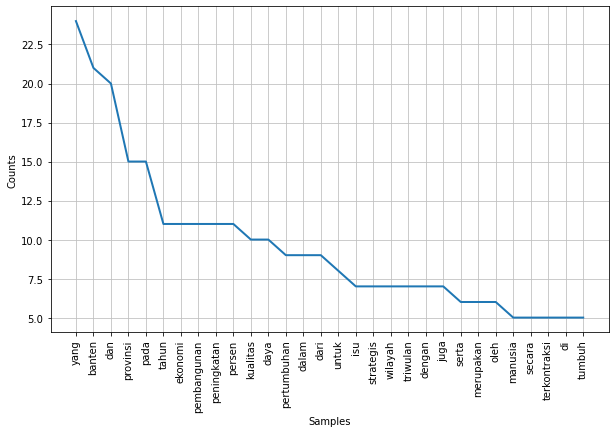

In [456]:
#Hitung frekuensi kata yang banyak muncul sebelum di stopword
def freqword(tokens):
    kemunculan = nltk.FreqDist(tokens)
    print(kemunculan.most_common())
    kemunculan.plot(30,cumulative=False)
    plt.show()

#Hitung frekuensi per provinsi
frekisu = df['Isu Strategis'].apply(freqword)

In [263]:
#Stopword pada token kata
#proses filtering
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory


def stopword_removal(comments):
    stop_factory = StopWordRemoverFactory()
    more_stopword = ['dengan','ia', 'bahwa','oleh','tahun', 'yang', 'di', 'a', 'b', 'c', 'd', 'e']
    data_stopword = stop_factory.get_stop_words()+more_stopword
    stopwordi = stop_factory.create_stop_word_remover()
    stopwordi
    stopword2 = stopwords.words('english')
    filtering = data_stopword+stopword2
    x = []
    data = []
    def myFunc(x):
        if x in filtering:
            return False
        else:
            return True
    fit = filter(myFunc, comments)
    for x in fit:
        data.append(x)
    return data

df['Isu Strategis'] = df['Isu Strategis'].apply(stopword_removal)
df

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     Hostname mismatch, certificate is not valid for
[nltk_data]     'raw.githubusercontent.com'. (_ssl.c:1125)>


False

,Provinsi,Isu Strategis
0,DKI Jakarta,"[peningkatan, kualitas, pembangunan, kesehatan..."
1,Jawa Barat,"[kualitas, nilai, kehidupan, daya, saing, sumb..."
2,Jawa Tengah,"[penanggulangan, kemiskinan, kemiskinan, merup..."
3,DI Yogyakarta,"[optimalnya, derajat, kualitas, sumberdaya, ma..."
4,Jawa Timur,"[tercukupinya, tenaga, kerja, terampil, berkua..."
5,Banten,"[isu, strategis, provinsi, banten, dirumuskan,..."


In [264]:
df['Isu Strategis']

0    [peningkatan, kualitas, pembangunan, kesehatan...
1    [kualitas, nilai, kehidupan, daya, saing, sumb...
2    [penanggulangan, kemiskinan, kemiskinan, merup...
3    [optimalnya, derajat, kualitas, sumberdaya, ma...
4    [tercukupinya, tenaga, kerja, terampil, berkua...
5    [isu, strategis, provinsi, banten, dirumuskan,...
Name: Isu Strategis, dtype: object

[('penguatan', 7), ('peningkatan', 6), ('pangan', 6), ('kesehatan', 5), ('melalui', 5), ('pendidikan', 5), ('kualitas', 3), ('sistem', 3), ('digitalisasi', 3), ('ketahanan', 3), ('umkm', 3), ('reformasi', 2), ('optimalisasi', 2), ('urban', 2), ('akses', 2), ('penerima', 2), ('bantuan', 2), ('ekonomi', 2), ('biaya', 2), ('mahasiswa', 2), ('kartu', 2), ('jakarta', 2), ('investasi', 2), ('baik', 2), ('sosial', 2), ('data', 2), ('bansos', 2), ('pembangunan', 1), ('upaya', 1), ('preventif', 1), ('phbs', 1), ('germas', 1), ('program', 1), ('health', 1), ('peran', 1), ('puskesmas', 1), ('posyandu', 1), ('layanan', 1), ('pembayaran', 1), ('asuransi', 1), ('iuran', 1), ('pbi', 1), ('bpjs', 1), ('pelayanan', 1), ('rsud', 1), ('f', 1), ('lab', 1), ('daerah', 1), ('g', 1), ('pemanfaatan', 1), ('teknologi', 1), ('informasi', 1), ('pelatihan', 1), ('vokasi', 1), ('mendukung', 1), ('pemulihan', 1), ('satuan', 1), ('pemberian', 1), ('personal', 1), ('peserta', 1), ('didik', 1), ('keluarga', 1), ('mamp

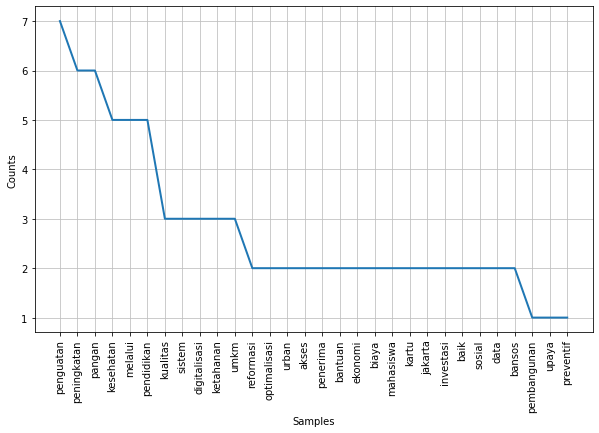

[('optimal', 18), ('optimalnya', 17), ('pembangunan', 13), ('masyarakat', 12), ('jawa', 12), ('barat', 12), ('daya', 8), ('daerah', 8), ('rendahnya', 7), ('ekonomi', 7), ('akses', 6), ('budaya', 6), ('pertanian', 6), ('tingkat', 6), ('desa', 6), ('kualitas', 5), ('kerja', 5), ('lingkungan', 5), ('provinsi', 5), ('pelayanan', 5), ('informasi', 5), ('tinggi', 4), ('dampak', 4), ('pandemi', 4), ('covid', 4), ('olahraga', 4), ('pengembangan', 4), ('jumlah', 4), ('standar', 4), ('sosial', 4), ('sektor', 4), ('peningkatan', 4), ('pemanfaatan', 4), ('air', 4), ('industri', 4), ('penerapan', 4), ('lahan', 4), ('koperasi', 4), ('meratanya', 3), ('partisipasi', 3), ('pemerataan', 3), ('kesehatan', 3), ('memerlukan', 3), ('percepatan', 3), ('pemulihan', 3), ('kondisi', 3), ('lokal', 3), ('promosi', 3), ('meningkatnya', 3), ('terbatas', 3), ('penurunan', 3), ('pertumbuhan', 3), ('perekonomian', 3), ('jalan', 3), ('antar', 3), ('layanan', 3), ('maupun', 3), ('aktivitas', 3), ('domestik', 3), ('meni

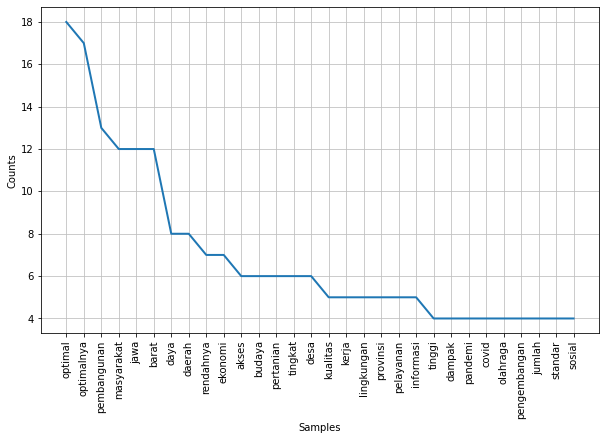

[('jawa', 51), ('tengah', 51), ('masyarakat', 49), ('sektor', 38), ('menjadi', 29), ('industri', 27), ('pertanian', 27), ('ekonomi', 26), ('pembangunan', 26), ('kerja', 24), ('kesehatan', 24), ('persen', 23), ('isu', 20), ('daya', 20), ('covid', 19), ('tenaga', 19), ('pangan', 18), ('kelompok', 17), ('pendidikan', 16), ('nasional', 16), ('usaha', 15), ('peningkatan', 15), ('daerah', 14), ('kondisi', 14), ('pasar', 14), ('pemerintah', 14), ('kemiskinan', 13), ('penduduk', 13), ('petani', 12), ('maupun', 12), ('produksi', 12), ('pandemi', 12), ('semakin', 12), ('manusia', 12), ('baik', 12), ('usia', 12), ('modal', 12), ('tingkat', 11), ('satu', 11), ('kualitas', 11), ('sumber', 11), ('tersebut', 11), ('penting', 11), ('budaya', 11), ('pertumbuhan', 11), ('energi', 11), ('rumah', 10), ('akses', 10), ('pengembangan', 10), ('akibat', 10), ('terjadi', 10), ('hidup', 10), ('cukup', 10), ('pariwisata', 10), ('sosial', 9), ('bagaimana', 9), ('berdampak', 9), ('persoalan', 9), ('pengelolaan', 9)

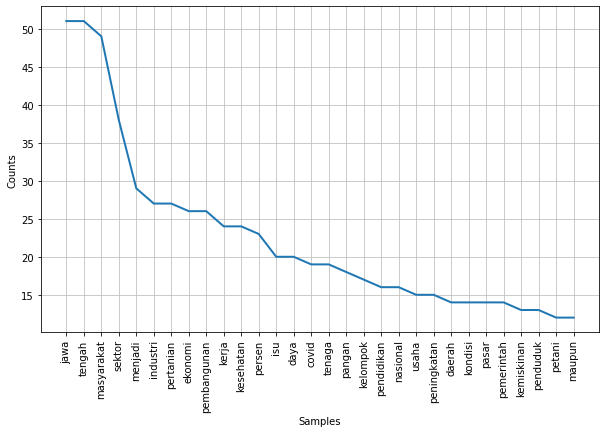

[('diy', 38), ('sebesar', 29), ('pendidikan', 24), ('jumlah', 24), ('terdapat', 18), ('angka', 16), ('data', 16), ('sosial', 16), ('sebanyak', 15), ('kasus', 15), ('kesehatan', 14), ('kondisi', 14), ('orang', 14), ('masyarakat', 13), ('pelayanan', 12), ('tinggi', 12), ('bencana', 11), ('optimal', 10), ('urusan', 10), ('standar', 10), ('jalan', 10), ('air', 10), ('km', 10), ('covid', 9), ('ruang', 9), ('sekolah', 9), ('penduduk', 9), ('kualitas', 8), ('layanan', 8), ('permasalahan', 8), ('daerah', 8), ('pandemi', 8), ('mengalami', 8), ('menunjukkan', 8), ('dinas', 8), ('kejadian', 8), ('rendah', 7), ('tingkat', 7), ('tersebut', 7), ('guru', 7), ('dibandingkan', 7), ('anak', 7), ('rumah', 7), ('jiwa', 7), ('total', 7), ('rdtr', 7), ('izin', 7), ('optimalnya', 6), ('wilayah', 6), ('merata', 6), ('ekonomi', 6), ('baik', 6), ('kawasan', 6), ('rencana', 6), ('memenuhi', 6), ('berdasarkan', 6), ('memiliki', 6), ('peningkatan', 6), ('penyakit', 6), ('baru', 6), ('kewenangan', 6), ('mencapai', 

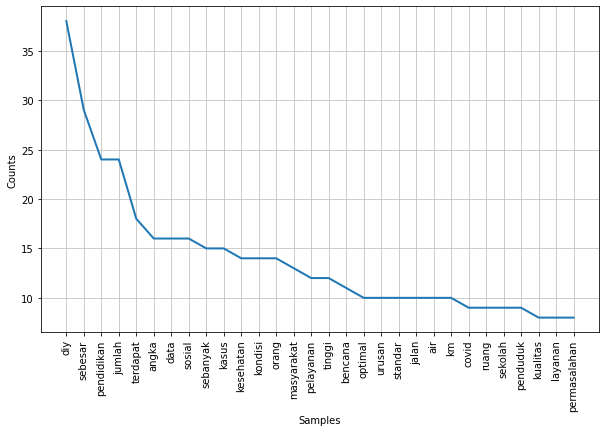

[('isu', 8), ('strategis', 8), ('peningkatan', 7), ('wilayah', 6), ('jawa', 6), ('timur', 6), ('akses', 5), ('lingkungan', 5), ('kemiskinan', 5), ('masyarakat', 5), ('kerja', 4), ('berkualitas', 4), ('industri', 4), ('terhubung', 4), ('prioritas', 4), ('nasional', 4), ('atas', 4), ('usaha', 4), ('optimalnya', 4), ('banjir', 4), ('tingginya', 4), ('perdesaan', 4), ('kebutuhan', 3), ('pusat', 3), ('meningkatkan', 3), ('manusia', 3), ('dijabarakan', 3), ('rinci', 3), ('berikut', 3), ('kualitas', 3), ('ekonomi', 3), ('antar', 3), ('layanan', 3), ('layak', 3), ('sektor', 3), ('bencana', 3), ('desa', 3), ('tenaga', 2), ('berteknologi', 2), ('tinggi', 2), ('sumberdaya', 2), ('berdaya', 2), ('saing', 2), ('pembangunan', 2), ('sesuai', 2), ('dunia', 2), ('infrastruktur', 2), ('provinsi', 2), ('kesenjangan', 2), ('menjamin', 2), ('pemerataan', 2), ('memperkuat', 2), ('penanganan', 2), ('air', 2), ('minum', 2), ('memerlukan', 2), ('dukungan', 2), ('upaya', 2), ('sanitasi', 2), ('sinergi', 2), ('k

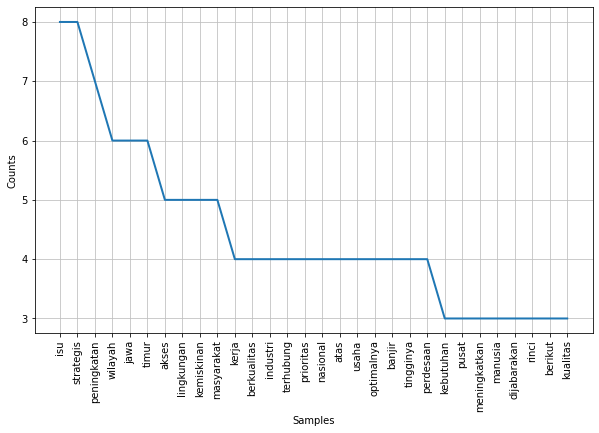

[('banten', 21), ('provinsi', 15), ('ekonomi', 11), ('pembangunan', 11), ('peningkatan', 11), ('persen', 11), ('kualitas', 10), ('daya', 10), ('pertumbuhan', 9), ('isu', 7), ('strategis', 7), ('wilayah', 7), ('triwulan', 7), ('merupakan', 6), ('manusia', 5), ('terkontraksi', 5), ('tumbuh', 5), ('perlu', 5), ('permintaan', 5), ('lapangan', 5), ('usaha', 5), ('rpjmd', 5), ('ipm', 5), ('pandemi', 4), ('covid', 4), ('integrasi', 4), ('antar', 4), ('tersebut', 4), ('kontraksi', 4), ('lebih', 4), ('sisi', 4), ('meningkatkan', 4), ('menjadi', 4), ('indikator', 4), ('infrastruktur', 4), ('pasca', 3), ('mitigasi', 3), ('bencana', 3), ('sumber', 3), ('baik', 3), ('iv', 3), ('ratarata', 3), ('menunjukkan', 3), ('mencapai', 3), ('upaya', 3), ('beli', 3), ('ketidakseimbangan', 3), ('salah', 3), ('satu', 3), ('saing', 3), ('aci', 3), ('fisik', 3), ('hidup', 3), ('perlambatan', 3), ('berikut', 2), ('pemerintahan', 2), ('sebelumnya', 2), ('nasional', 2), ('pemulihan', 2), ('ii', 2), ('q', 2), ('meskip

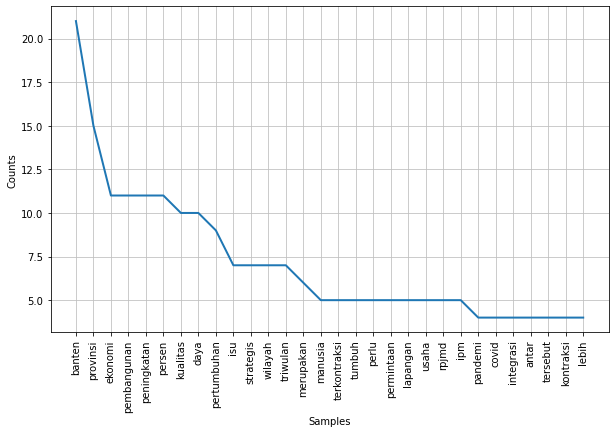

In [265]:
#Hitung frequensi kata yang sering muncul setelah stopwprd
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

def freqword(tokens):
    kemunculan = nltk.FreqDist(tokens)
    print(kemunculan.most_common())
    kemunculan.plot(30,cumulative=False)
    plt.show()

#Hitung frekuensi
frekisu = df['Isu Strategis'].apply(freqword)

In [487]:
#Tokenization Kalimat dan secara keseluruhan (seluruh provinsi)
df2 = pd.read_csv('Isu_Strategis_Jawa_RKPD_2022.csv', sep=';')
df2

,Provinsi,Isu Strategis
0,DKI Jakarta,Peningkatan Kualitas Pembangunan Kesehatan: Re...
1,Jawa Barat,Kualitas nilai kehidupan dan daya saing sumber...
2,Jawa Tengah,a. Penanggulangan Kemiskinan Kemiskinan merupa...
3,DI Yogyakarta,1. Belum Optimalnya Derajat Kualitas Sumberday...
4,Jawa Timur,Belum tercukupinya tenaga kerja yang terampil ...
5,Banten,Isu strategis Provinsi Banten Tahun 2022 dirum...


In [488]:
#Normalisasi Text
#Cleaning Character, lower case, hapus angka dsb
import nltk
import re
def casefolding(comment):
    comment = comment.lower()
    comment = comment.strip(" ")
    comment = re.sub(r'[?|$|.|!_:\/")(-+,)]|', '', comment)
    comment = re.sub(r'-|%&!”#’*;}<=~>≤@^`{', '', comment)
    comment = re.sub(r"\d+", "", comment) #hapus angka
    return comment

df2['Isu Strategis'] = df2['Isu Strategis'].apply(casefolding)

In [489]:
def preprocess(ReviewText):
    ReviewText = ReviewText.str.replace("(<br/>)", "")
    ReviewText = ReviewText.str.replace('(<a).*(>).*(</a>)', '')
    ReviewText = ReviewText.str.replace('(&amp)', '')
    ReviewText = ReviewText.str.replace('(&gt)', '')
    ReviewText = ReviewText.str.replace('(&lt)', '')
    ReviewText = ReviewText.str.replace('(\xa0)', '')
    ReviewText = ReviewText.str.replace('%', '') 
    return ReviewText
df2['Isu Strategis'] = preprocess(df2['Isu Strategis'])

In [490]:
#Stopword
#proses filtering Kalimat untuk semua provinsi
#1 Kata
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

stop_factory = StopWordRemoverFactory()
more_stopword = ['dengan','ia', 'bahwa','oleh','tahun', 'yang', 'di', 'a', 'b', 'c', 'd', 'e', 'jawa','tengah','nasional','provinsi','diy','antar']
data_stopword = stop_factory.get_stop_words()+more_stopword
stopwordi = stop_factory.create_stop_word_remover()
stopword2 = stopwords.words('english')
filtering = data_stopword+stopword2

def stopword_removal_kal(corpus,n):
    stop_factory = StopWordRemoverFactory()
    more_stopword = ['dengan','ia', 'bahwa','oleh','tahun', 'yang', 'di', 'a', 'b', 'c', 'd', 'e', 'jawa','tengah','nasional','provinsi','diy','antar']
    data_stopword = stop_factory.get_stop_words()+more_stopword
    stopwordi = stop_factory.create_stop_word_remover()
    stopword2 = stopwords.words('english')
    filtering = data_stopword+stopword2
    vec = CountVectorizer(stop_words = filtering).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

df21 = stopword_removal_kal(df2['Isu Strategis'],20)
df21

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\BAPPENAS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[('masyarakat', 81),
 ('pembangunan', 55),
 ('ekonomi', 55),
 ('peningkatan', 49),
 ('kesehatan', 48),
 ('pendidikan', 47),
 ('sektor', 47),
 ('daya', 41),
 ('kualitas', 40),
 ('pertanian', 40),
 ('kerja', 38),
 ('industri', 38),
 ('covid', 37),
 ('jumlah', 37),
 ('persen', 37),
 ('isu', 35),
 ('menjadi', 35),
 ('sebesar', 35),
 ('daerah', 33),
 ('sosial', 31)]

In [491]:
for word, freq in df21:
    print(word, freq)
df211 = pd.DataFrame(df21, columns = ['Isu Strategis' , 'count'])

masyarakat 81
pembangunan 55
ekonomi 55
peningkatan 49
kesehatan 48
pendidikan 47
sektor 47
daya 41
kualitas 40
pertanian 40
kerja 38
industri 38
covid 37
jumlah 37
persen 37
isu 35
menjadi 35
sebesar 35
daerah 33
sosial 31


In [492]:
df211.groupby('Isu Strategis').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top words in Isu Strategis after removing stop words')

In [493]:
#2 Kata
def get_top_n_bigram(corpus,n):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words=filtering).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

df22 = get_top_n_bigram(df2['Isu Strategis'],20)
for word, freq in df22:
    print(word, freq)
df221 = pd.DataFrame(df22, columns = ['Isu Strategis' , 'count'])

pandemi covid 25
tenaga kerja 21
isu strategis 16
sektor pertanian 14
rumah tangga 14
peningkatan kualitas 13
sumber daya 13
daya saing 12
pertumbuhan ekonomi 12
daya manusia 9
salah satu 9
sebesar orang 9
kelompok masyarakat 8
sarana prasarana 8
pelayanan kesehatan 8
tata kelola 7
memenuhi standar 7
industri pengolahan 7
sumberdaya manusia 7
layanan pendidikan 7


In [494]:
df221.groupby('Isu Strategis').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top two words in Isu Strategis after removing stop words')

In [495]:
#3 Kata
def get_top_n_trigram(corpus,n):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words=filtering).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

df23 = get_top_n_trigram(df2['Isu Strategis'],20)
for word, freq in df23:
    print(word, freq)
df231 = pd.DataFrame(df23, columns = ['Isu Strategis' , 'count'])

sumber daya manusia 9
usaha mikro kecil 5
tata kelola pemerintahan 5
tingkat pengangguran terbuka 5
kualitas sumber daya 5
dinas pendidikan pemuda 5
pendidikan pemuda olahraga 5
dampak pandemi covid 4
merupakan salah satu 4
air minum layak 4
isu strategis terhubung 4
strategis terhubung prioritas 4
integrasi pembangunan wilayah 4
pandemi covid memerlukan 3
covid memerlukan percepatan 3
memerlukan percepatan pemulihan 3
percepatan pemulihan kondisi 3
tenaga kerja sektor 3
daya saing ekonomi 3
berkualitas berdaya saing 3


In [496]:
df231.groupby('Isu Strategis').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top three words in Isu Strategis after removing stop words')

In [503]:
#Updating Stopword for Stemming
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary

def stopworddd(kalimat):
    stop_factory = StopWordRemoverFactory()
    more_stopword = ['dengan','ia', 'bahwa','oleh','tahun', 'yang', 'di', 'a', 'b', 'c', 'd', 'e', 
                     'jawa','tengah','nasional','provinsi','diy','antar', 'belum','jadi', 'salah','satu', 'barat','dki', 'timur',
                    'isu','strategis','tingkat']
    data_stopword = stop_factory.get_stop_words()+more_stopword
    stopword2 = stopwords.words('english')
    filtering = ArrayDictionary(data_stopword+stopword2)
    stopwordd = StopWordRemover(filtering)
    kalimat2 = stopwordd.remove(kalimat)
    return kalimat2

dfstem = df2
dfstem['Isu Strategis']=dfstem['Isu Strategis'].apply(stopworddd)
dfstem['Isu Strategis']

0    kualitas bangun sehat reformasi sistem sehat o...
1    kualitas nilai hidup daya saing sumber daya ma...
2    tanggulang miskin miskin rupa global daerah ja...
3    optimal derajat kualitas sumberdaya manusia di...
4    cukup tenaga kerja terampil kualitas butuh ind...
5    banten rumus ikut tumbuh ekonomi pasca pandemi...
Name: Isu Strategis, dtype: object

In [504]:
dfstem

,Provinsi,Isu Strategis
0,DKI Jakarta,kualitas bangun sehat reformasi sistem sehat o...
1,Jawa Barat,kualitas nilai hidup daya saing sumber daya ma...
2,Jawa Tengah,tanggulang miskin miskin rupa global daerah ja...
3,DI Yogyakarta,optimal derajat kualitas sumberdaya manusia di...
4,Jawa Timur,cukup tenaga kerja terampil kualitas butuh ind...
5,Banten,banten rumus ikut tumbuh ekonomi pasca pandemi...


In [505]:
#Stemming
def stemmingkal(kalimat):
    stem_factory = StemmerFactory()
    stemmer = stem_factory.create_stemmer()
    kalimat3 = stemmer.stem(kalimat)
    return kalimat3

dfstem['Isu Strategis']=dfstem['Isu Strategis'].apply(stemmingkal)
dfstem['Isu Strategis']

0    kualitas bangun sehat reformasi sistem sehat o...
1    kualitas nilai hidup daya saing sumber daya ma...
2    tanggulang miskin miskin rupa global daerah ja...
3    optimal derajat kualitas sumberdaya manusia di...
4    cukup tenaga kerja terampil kualitas butuh ind...
5    banten rumus ikut tumbuh ekonomi pasca pandemi...
Name: Isu Strategis, dtype: object

In [506]:
dfstem

,Provinsi,Isu Strategis
0,DKI Jakarta,kualitas bangun sehat reformasi sistem sehat o...
1,Jawa Barat,kualitas nilai hidup daya saing sumber daya ma...
2,Jawa Tengah,tanggulang miskin miskin rupa global daerah ja...
3,DI Yogyakarta,optimal derajat kualitas sumberdaya manusia di...
4,Jawa Timur,cukup tenaga kerja terampil kualitas butuh ind...
5,Banten,banten rumus ikut tumbuh ekonomi pasca pandemi...


In [507]:
#1 Kata
def get_top_n_unigram(corpus,n):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

df31 = get_top_n_unigram(dfstem['Isu Strategis'],20)
for word, freq in df31:
    print(word, freq)
df311 = pd.DataFrame(df31, columns = ['Isu Strategis' , 'count'])
df311.groupby('Isu Strategis').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='20 Top Unigrams in Isu Strategis after removing stop words')

masyarakat 81
ekonomi 65
optimal 62
kerja 61
bangun 59
tani 55
didik 52
daya 52
sehat 51
besar 49
layan 48
kualitas 47
sektor 47
jumlah 43
tinggi 39
industri 38
covid 37
persen 37
usaha 35
miskin 34


In [508]:
#2 Kata
def get_top_n_bigram(corpus,n):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

df32 = get_top_n_bigram(dfstem['Isu Strategis'],20)
for word, freq in df32:
    print(word, freq)
df321 = pd.DataFrame(df32, columns = ['Isu Strategis' , 'count'])
df321.groupby('Isu Strategis').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='20 Top Bigrams in Isu Strategis after removing stop words')

pandemi covid 25
tenaga kerja 21
daya saing 15
sektor tani 14
rumah tangga 14
sumber daya 13
tumbuh ekonomi 12
layan sehat 10
daya manusia 9
besar orang 9
penuh standar 8
kelompok masyarakat 8
sarana prasarana 8
tata kelola 7
sesuai butuh 7
masyarakat desa 7
industri olah 7
sumberdaya manusia 7
layan didik 7
tanam modal 7


In [509]:
#3 Kata
def get_top_n_trigram(corpus,n):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

df33 = get_top_n_trigram(dfstem['Isu Strategis'],20)
for word, freq in df33:
    print(word, freq)
df331 = pd.DataFrame(df33, columns = ['Isu Strategis' , 'count'])
df331.groupby('Isu Strategis').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top Bigrams in Isu Strategis after removing stop words')

sumber daya manusia 9
dampak pandemi covid 5
serap tenaga kerja 5
usaha mikro kecil 5
tata kelola perintah 5
kualitas daya saing 5
kualitas sumber daya 5
dinas didik pemuda 5
didik pemuda olahraga 5
dasar data dinas 4
data dinas didik 4
akses air minum 4
air minum layak 4
integrasi bangun wilayah 4
pandemi covid perlu 3
covid perlu cepat 3
perlu cepat pulih 3
cepat pulih kondisi 3
tenaga kerja sektor 3
kerja sektor tani 3


New column for sentiment polarity. Two new columns for lengths of the review and word count.

In [40]:
import nltk

# Topic Modeling with LSA

In [554]:
def removespacee(kalimat):
    kal1 = kalimat.strip()
    return kal1

dfstem['Isu Strategis'] = dfstem['Isu Strategis'].apply(removespacee)
dfstem

,Provinsi,Isu Strategis
0,DKI Jakarta,kualitas bangun sehat reformasi sistem sehat o...
1,Jawa Barat,kualitas nilai hidup daya saing sumber daya ma...
2,Jawa Tengah,tanggulang miskin miskin rupa global daerah ja...
3,DI Yogyakarta,optimal derajat kualitas sumberdaya manusia di...
4,Jawa Timur,cukup tenaga kerja terampil kualitas butuh ind...
5,Banten,banten rumus ikut tumbuh ekonomi pasca pandemi...


In [556]:
vect =TfidfVectorizer(max_features=1000) # to play with. min_df,max_df,max_features etc...

In [557]:
vect_text=vect.fit_transform(dfstem['Isu Strategis'])

In [558]:
print(vect_text.shape)
print(vect_text)

(6, 1000)
  (0, 22)	0.05727644809231515
  (0, 274)	0.05727644809231515
  (0, 814)	0.08273208198291036
  (0, 179)	0.05727644809231515
  (0, 560)	0.05727644809231515
  (0, 660)	0.06784149072482558
  (0, 480)	0.06784149072482558
  (0, 824)	0.08273208198291036
  (0, 224)	0.08273208198291036
  (0, 551)	0.29448938621859394
  (0, 715)	0.08273208198291036
  (0, 748)	0.04238585683423036
  (0, 546)	0.06784149072482558
  (0, 83)	0.16546416396582073
  (0, 144)	0.09816312873953131
  (0, 806)	0.09816312873953131
  (0, 474)	0.04908156436976566
  (0, 309)	0.04908156436976566
  (0, 130)	0.06784149072482558
  (0, 659)	0.04908156436976566
  (0, 456)	0.036724716776646744
  (0, 92)	0.06784149072482558
  (0, 673)	0.08273208198291036
  (0, 892)	0.04908156436976566
  (0, 70)	0.09816312873953131
  :	:
  (5, 286)	0.04532228455540461
  (5, 532)	0.017493953509782178
  (5, 659)	0.034987907019564356
  (5, 456)	0.013089649773802496
  (5, 70)	0.08746976754891089
  (5, 400)	0.013089649773802496
  (5, 871)	0.0151074281

In [560]:
idf=vect.idf_
dd=dict(zip(vect.get_feature_names(), idf))
l=sorted(dd, key=(dd).get)
# print(l)
print(l[0],l[-1])

bangun yogyakarta


In [561]:
print(dd['bangun']) #police is most common and forecast is least common among the news headlines.
print(dd['yogyakarta'])

1.0
2.252762968495368


In [562]:
from sklearn.decomposition import TruncatedSVD
lsa_model = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=10, random_state=42)

lsa_top=lsa_model.fit_transform(vect_text)

In [563]:
print(lsa_top)
print(lsa_top.shape) 

[[ 3.74912715e-01  8.23281726e-01  3.90903445e-01  1.45509247e-01
   1.30275284e-02 -8.65996293e-02]
 [ 7.42353490e-01 -5.71267754e-02 -2.76971100e-01 -1.22921751e-02
   5.32111376e-01 -2.92645218e-01]
 [ 7.97465699e-01  6.99107732e-04 -8.09349206e-03 -7.53823447e-02
   1.15112690e-01  5.87408747e-01]
 [ 7.02644095e-01  7.34325118e-02 -1.72101696e-01 -5.36715333e-01
  -3.92249818e-01 -1.71337913e-01]
 [ 6.73255645e-01 -1.60395424e-01 -2.13038140e-01  6.03455640e-01
  -3.26340986e-01 -7.04112696e-02]
 [ 4.39600192e-01 -4.78657290e-01  7.50376023e-01 -3.29238947e-02
   8.24745908e-03 -1.15856338e-01]]
(6, 6)


In [564]:
l=lsa_top[0]
print("Document 0 :")
for i,topic in enumerate(l):
  print("Topic ",i," : ",topic*100)

Document 0 :
Topic  0  :  37.491271458535394
Topic  1  :  82.3281725626611
Topic  2  :  39.09034451982568
Topic  3  :  14.550924687718068
Topic  4  :  1.3027528437032876
Topic  5  :  -8.659962932774565


In [565]:
print(lsa_model.components_.shape) # (no_of_topics*no_of_words)
print(lsa_model.components_)

(6, 1000)
[[ 3.13398030e-03  1.57582292e-02  9.40194090e-03 ...  5.25274307e-03
   4.14276635e-03  1.65710654e-02]
 [ 7.20312256e-06 -4.49848903e-02  2.16093677e-05 ... -1.49949634e-02
   1.13510457e-03  4.54041828e-03]
 [-9.04668887e-05  7.65064318e-02 -2.71400666e-04 ...  2.55021439e-02
  -2.88608852e-03 -1.15443541e-02]
 [-1.07463414e-03 -4.28121940e-03 -3.22390241e-03 ... -1.42707313e-03
  -1.14790456e-02 -4.59161825e-02]
 [ 2.00435965e-03  1.30989929e-03  6.01307894e-03 ...  4.36633098e-04
  -1.02467464e-02 -4.09869857e-02]
 [ 1.17238157e-02 -2.10918006e-02  3.51714470e-02 ... -7.03060021e-03
  -5.13041900e-03 -2.05216760e-02]]


In [582]:
# most important words for each topic
vocab = vect.get_feature_names()

for i, comp in enumerate(lsa_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:5]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
optimal masyarakat ekonomi daya bangun 

Topic 1: 
kuat pangan didik lalu digitalisasi 

Topic 2: 
banten kontraksi tumbuh triwulan persen 

Topic 3: 
desa prioritas dijabarakan timur banjir 

Topic 4: 
optimal bangun budaya rendah akibat 

Topic 5: 
tengah sektor kelompok tani kait 



In [585]:
from wordcloud import WordCloud
# Generate a word cloud image for given topic
def draw_word_cloud(index):
  imp_words_topic=""
  comp=lsa_model.components_[index]
  vocab_comp = zip(vocab, comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:50]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]

  wordcloud = WordCloud(width=600, height=400).generate(imp_words_topic)
  plt.figure(figsize=(10,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()

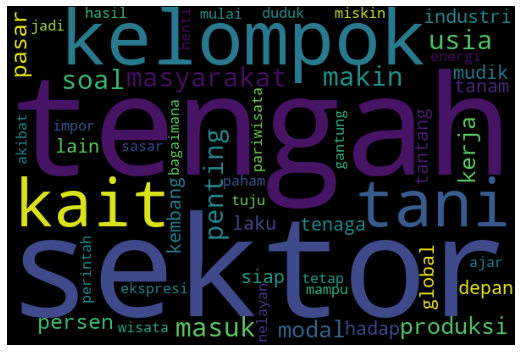

In [591]:
draw_word_cloud(5)

In [605]:
#Latent Dirichlet Allocation
from sklearn.decomposition import LatentDirichletAllocation
lda_model=LatentDirichletAllocation(n_components=6,learning_method='online',random_state=42,max_iter=1) 
# n_components is the number of topics

lda_top=lda_model.fit_transform(vect_text)
print(lda_top.shape)  # (no_of_doc,no_of_topics)
print(lda_top)

(6, 6)
[[0.01900581 0.01901959 0.01900919 0.90495496 0.01900838 0.01900207]
 [0.01244358 0.93778243 0.01244343 0.0124414  0.01244714 0.01244201]
 [0.95473522 0.00905173 0.0090516  0.0090536  0.00905621 0.00905163]
 [0.01031939 0.0103181  0.01031734 0.01032184 0.94840668 0.01031665]
 [0.01380619 0.01382995 0.93093612 0.01381172 0.01381077 0.01380525]
 [0.01660746 0.01660104 0.01660299 0.01661496 0.91697021 0.01660335]]


In [606]:
sum=0
for i in lda_top[0]:
  sum=sum+i
print(sum)

1.0000000000000002


In [607]:
# composition of doc 0 for eg
print("Isu Strategis: ")
for i,topic in enumerate(lda_top[0]):
  print("Topic ",i,": ",topic*100,"%")

Isu Strategis: 
Topic  0 :  1.900581153045234 %
Topic  1 :  1.9019587569248537 %
Topic  2 :  1.9009190737266308 %
Topic  3 :  90.49549639634414 %
Topic  4 :  1.9008376530330358 %
Topic  5 :  1.900206966926122 %


In [608]:
print(lda_model.components_)
print(lda_model.components_.shape)  # (no_of_topics*no_of_words)

[[0.88456293 0.83057649 0.82831103 ... 0.93980067 0.76875547 0.86125948]
 [0.92354026 0.88312525 0.64146332 ... 0.83884373 0.87022845 1.06326706]
 [0.70132674 0.83913346 0.89488094 ... 0.94611051 0.78958637 0.82079572]
 [0.725212   0.82397566 0.86001463 ... 0.91405997 0.72884573 0.94237798]
 [1.08238734 0.8530774  0.82401437 ... 0.89892187 0.76771879 0.86568741]
 [0.90283045 0.72319089 0.77239944 ... 0.83457858 0.8986279  0.757408  ]]
(6, 1000)


In [609]:
# most important words for each topic
vocab = vect.get_feature_names()

for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:5]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
cepat sumber tutup milik juru 

Topic 1: 
proyek optimal kompetensi lanjut kualitas 

Topic 2: 
bareng starting sejarah uji ruangruang 

Topic 3: 
tenaga ekonomi pidana hasil tpa 

Topic 4: 
policy konsep irigasi banyak layan 

Topic 5: 
tuju edar tanggulang spi kendali 



In [612]:
from wordcloud import WordCloud
# Generate a word cloud image for given topic
def draw_word_cloud(index):
  imp_words_topic=""
  comp=lda_model.components_[index]
  vocab_comp = zip(vocab, comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:50]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]

  wordcloud = WordCloud(width=600, height=400).generate(imp_words_topic)
  plt.figure( figsize=(10,10))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()

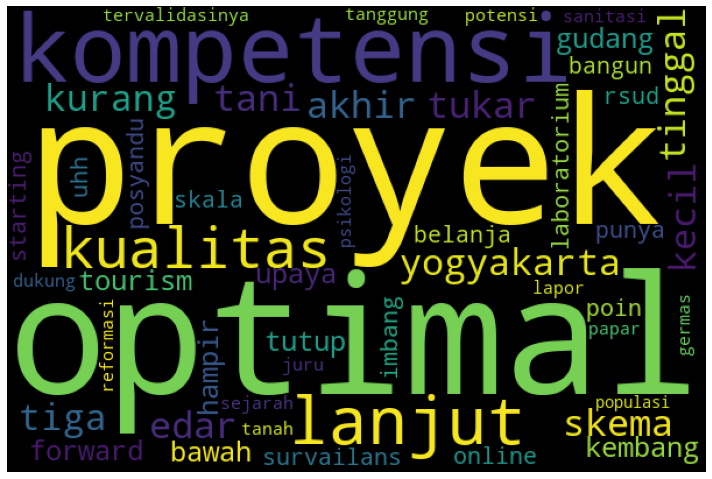

In [614]:
# topic 3
draw_word_cloud(1)